# Sphere valued data, i.e. $\mathbb{S}_2$, on grid-graph, i.e. $\mathbb{S}_2$-image

### arXiv: [Denoising of Sphere- and SO(3)-Valued Data by Relaxed Tikhonov Regularization](https://arxiv.org/abs/2307.10980)

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import RegularGridInterpolator
import scipy as sc
import scipy.stats
import time
from scipy import interpolate

from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec
import scipy
import time
from scipy.interpolate import CubicSpline
from scipy.stats import vonmises
from scipy.stats import vonmises_fisher

import condat_tv
import imp
import relaxed_tikhonov_sphere_image

lam = 10     #regularization parameter
iter = 250  #number of iterations
tau = 0.1   #parameter of the algorithm, >0
rho = 1     #parameter of the algorithm, in [1,2)

In [20]:
imp.reload(relaxed_tikhonov_sphere_image)

<module 'relaxed_tikhonov_sphere_image' from '/Users/jonasbresch/Desktop/cycle valued data/python/finale/github/relaxed_tikhonov_sphere_image.py'>

In [5]:
Noise, Data = relaxed_tikhonov_sphere_image.sample_vMF_image(10,3,30)

### Main algorithm

- ADMM_red : solving the proposed simplified and generalized convex optimization problem in ...
- ADMM : solving the complex-valued S_1-model proposed by Condat ...
- PMM : solving the complex-valued S_1-model proposed by Condat ...
- BASELINE : solving the state-of-the-art ball-relaxed problem 

In [31]:
q, qn, dataadmm, qres1, qres2, qtime = relaxed_tikhonov_sphere_image.ADMM_red(Noise, Data, 2*iter+1, 1, 3*rho, 5)

iteration 	| func-value 	| non-convex-cost 	| spherical-error
--------------------------------------------------------------------------
0 		|   2.111e+04 	|   4.143e+03 		|  9.577e-01
100 		|   4.963e+02 	|   9.188e+02 		| -1.841e-06
200 		|   4.962e+02 	|   9.183e+02 		| -1.441e-08
300 		|   4.962e+02 	|   9.183e+02 		| -9.504e-10
400 		|   4.962e+02 	|   9.183e+02 		| -8.857e-11
500 		|   4.962e+02 	|   9.182e+02 		| -9.252e-12
finale 		|  4.962e+02 				|  sphered
444 496.21565993990697 257.837877035141


In [39]:
print('MAE(Solution) = ', "%10.3e"%(np.sum(np.abs(q-Data))/np.size(q[0,:,:])), '\t| MAE(Noise) = ', "%10.3e"%(np.sum(np.abs(Noise-Data))/np.size(q[0,:,:])))
print('cMSE(Solution) = ', "%10.3e"%(np.sum(np.arccos(np.sum(q*Data,0))**2)/np.size(q[0,:,:])), '\t| cMSE(Noise) = ', "%10.3e"%(np.sum(np.arccos(np.sum(Noise*Data,0))**2)/np.size(q[0,:,:])))

MAE(Solution) =   1.457e-01 	| MAE(Noise) =   3.414e-01
cMSE(Solution) =   1.443e-02 	| cMSE(Noise) =   6.754e-02


In [9]:
Noise2 = np.zeros((4, np.shape(Noise)[1], np.shape(Noise)[2]))
Noise2[1:4] = Noise
Data2 = np.zeros((4, np.shape(Data)[1],np.shape(Data)[2]))
Data2[1:4] = Data

In [21]:
sW2, sX2, sY2, sZ2, datapmm = relaxed_tikhonov_sphere_image.PMM_S2S3_2D(Noise2, Data2, 1, 2*iter+1, tau, 1, 0, 5)

iteration 	| func-value 	| original-cost 	| spherical-error
-------------------------------------------------------------------
0 		|   2.316e+04 	|   2.319e+04 		|   9.000e-01
50 		|   2.979e+02 	|   1.660e+02 		|  -4.931e-03
100 		|   4.925e+02 	|   3.610e+02 		|  -8.437e-05
150 		|   4.964e+02 	|   3.648e+02 		|   4.256e-06
200 		|   4.962e+02 	|   3.646e+02 		|   3.201e-07
250 		|   4.962e+02 	|   3.646e+02 		|   6.492e-09
300 		|   4.962e+02 	|   3.646e+02 		|   1.434e-09
350 		|   4.962e+02 	|   3.646e+02 		|   6.483e-10
400 		|   4.962e+02 	|   3.645e+02 		|   2.389e-10
450 		|   4.962e+02 	|   3.645e+02 		|   8.583e-11
500 		|   4.962e+02 	|   3.645e+02 		|   3.087e-11
444 496.21565995064 223.70679306983948


In [16]:
q1, q1data = relaxed_tikhonov_sphere_image.baseline(Noise, Data, 1, 10*300+1, 0)

24120.0
iteration 	| func-value 	| original-cost 	| solution is
-------------------------------------------------------------------
0 		|   2.304e+04 	|   2.307e+04 		| unsphered
50 		|   3.719e+03 	|   3.611e+03 		| unsphered
100 		|   3.655e+03 	|   3.547e+03 		| unsphered
150 		|   3.655e+03 	|   3.547e+03 		| unsphered
200 		|   3.655e+03 	|   3.547e+03 		| unsphered
250 		|   3.655e+03 	|   3.547e+03 		| unsphered
300 		|   3.655e+03 	|   3.547e+03 		| unsphered
350 		|   3.655e+03 	|   3.547e+03 		| unsphered
400 		|   3.655e+03 	|   3.547e+03 		| unsphered
450 		|   3.655e+03 	|   3.547e+03 		| unsphered
500 		|   3.655e+03 	|   3.547e+03 		| unsphered
550 		|   3.655e+03 	|   3.547e+03 		| unsphered
600 		|   3.655e+03 	|   3.547e+03 		| unsphered
650 		|   3.655e+03 	|   3.547e+03 		| unsphered
700 		|   3.655e+03 	|   3.547e+03 		| unsphered
750 		|   3.655e+03 	|   3.547e+03 		| unsphered
800 		|   3.655e+03 	|   3.547e+03 		| unsphered
850 		|   3.655e+03 	|   3.547e+03 		|

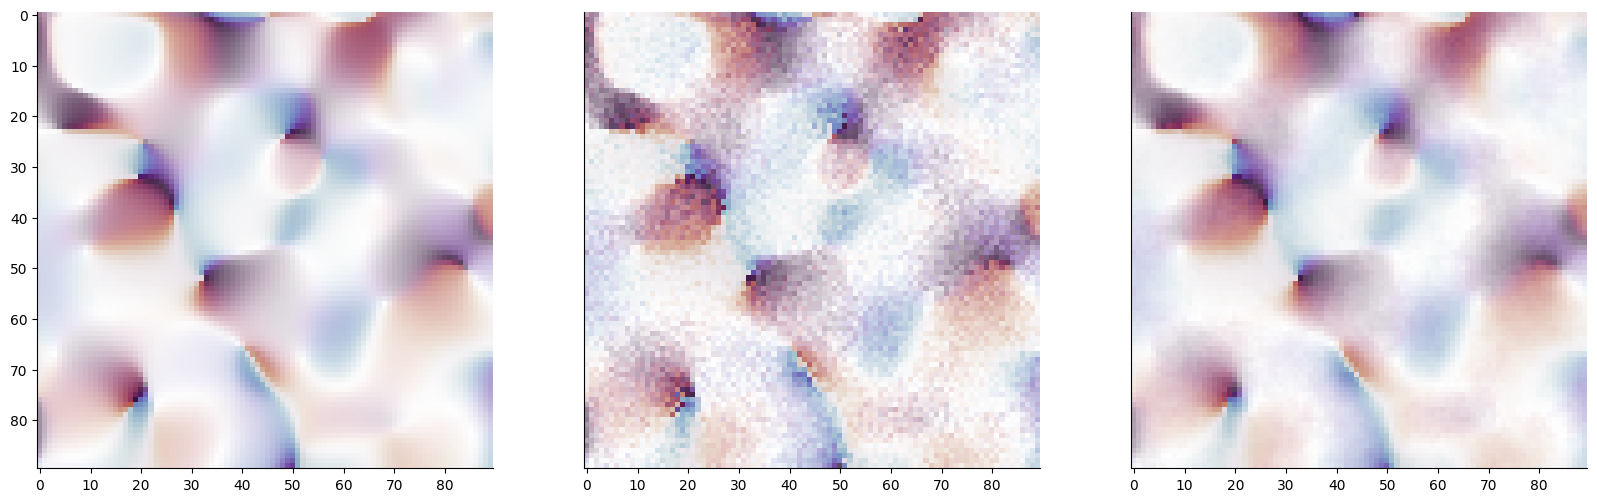

In [22]:
relaxed_tikhonov_sphere_image.plotS2_image(Noise, Data, q)

# RGB example

In [23]:
from matplotlib import image
from PIL import Image
import cv2

img = cv2.imread('orig_corals.jpg')

imgsmall = cv2.resize(img.copy(), (200,200), interpolation =cv2.INTER_AREA)

imgconv = cv2.cvtColor(imgsmall, cv2.COLOR_BGR2RGB)

#imgconv = cv2.cvtColor(imgsmall.copy(), cv2.COLOR_BGR2HSV)

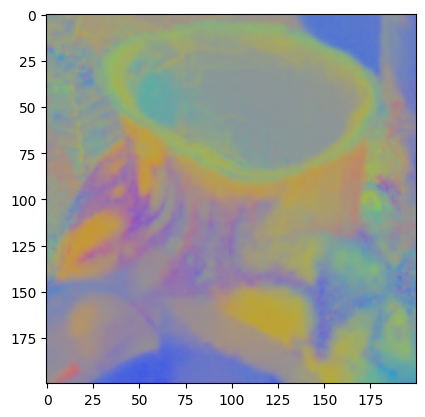

In [24]:
dataimg = np.transpose(imgconv, (2,0,1))

Dataimag = dataimg/np.linalg.norm(dataimg, axis=0)

plt.imshow(np.transpose(Dataimag,(1,2,0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


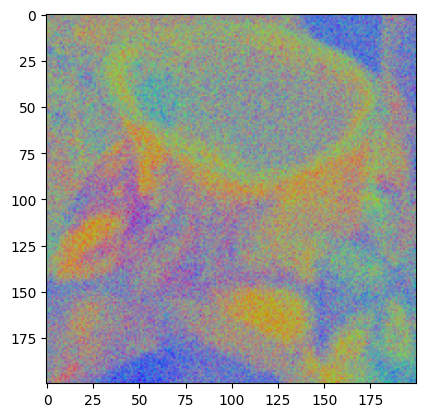

In [27]:
Noiseimag = relaxed_tikhonov_sphere_image.sample_vMF_noise_image(Dataimag, 100)

plt.imshow(np.transpose(Noiseimag,(1,2,0)))

In [33]:
q, qz = relaxed_tikhonov_sphere_image.ADMM_TV_BOX(Noiseimag, Dataimag, 0.06, 100, 1000)

iter. 	| funv-value 		| RMSE 		| error 	| spherical-error
----------------------------------------------------------------------------------
0  	|  39213.224389548865  	|    9.80e-01  	|    1.99e+00  	|    1.98e+02
100  	|  442.114828832798  	|    9.81e-04  	|    1.86e+00  	|    1.30e+00
200  	|  444.3302690119053  	|    9.35e-04  	|    3.86e-03  	|    3.74e-04
300  	|  444.5949721771979  	|    9.42e-04  	|    1.12e-03  	|    5.95e-05
400  	|  444.70035839845957  	|    9.45e-04  	|    3.87e-04  	|    1.59e-05
500  	|  444.739354084883  	|    9.45e-04  	|    1.42e-04  	|    3.88e-06
600  	|  444.7540601099581  	|    9.46e-04  	|    5.31e-05  	|    2.56e-06
700  	|  444.75962531424346  	|    9.46e-04  	|    2.00e-05  	|    2.55e-06
800  	|  444.7617285472621  	|    9.46e-04  	|    7.60e-06  	|    2.54e-06
900  	|  444.76252587198263  	|    9.46e-04  	|    2.90e-06  	|    6.07e-07
1000  	|  444.7628282832908  	|    9.46e-04  	|    1.11e-06  	|    6.04e-07


In [29]:
q, qn, dataadmm, qres1, qres2, qtime = relaxed_tikhonov_sphere_image.ADMM_red(Noiseimag, Dataimag, 1*iter+1, 2.5, 3*rho, 5)

iteration 	| func-value 	| non-convex-cost 	| spherical-error
--------------------------------------------------------------------------
0 		|   1.544e+05 	|   3.461e+03 		|  9.581e-01
100 		|   3.774e+02 	|   5.261e+01 		| -6.103e-09
200 		|   3.774e+02 	|   5.258e+01 		| -4.569e-11
finale 		|  3.774e+02 				|  sphered
213 377.3761997544807 538.3343451023102


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


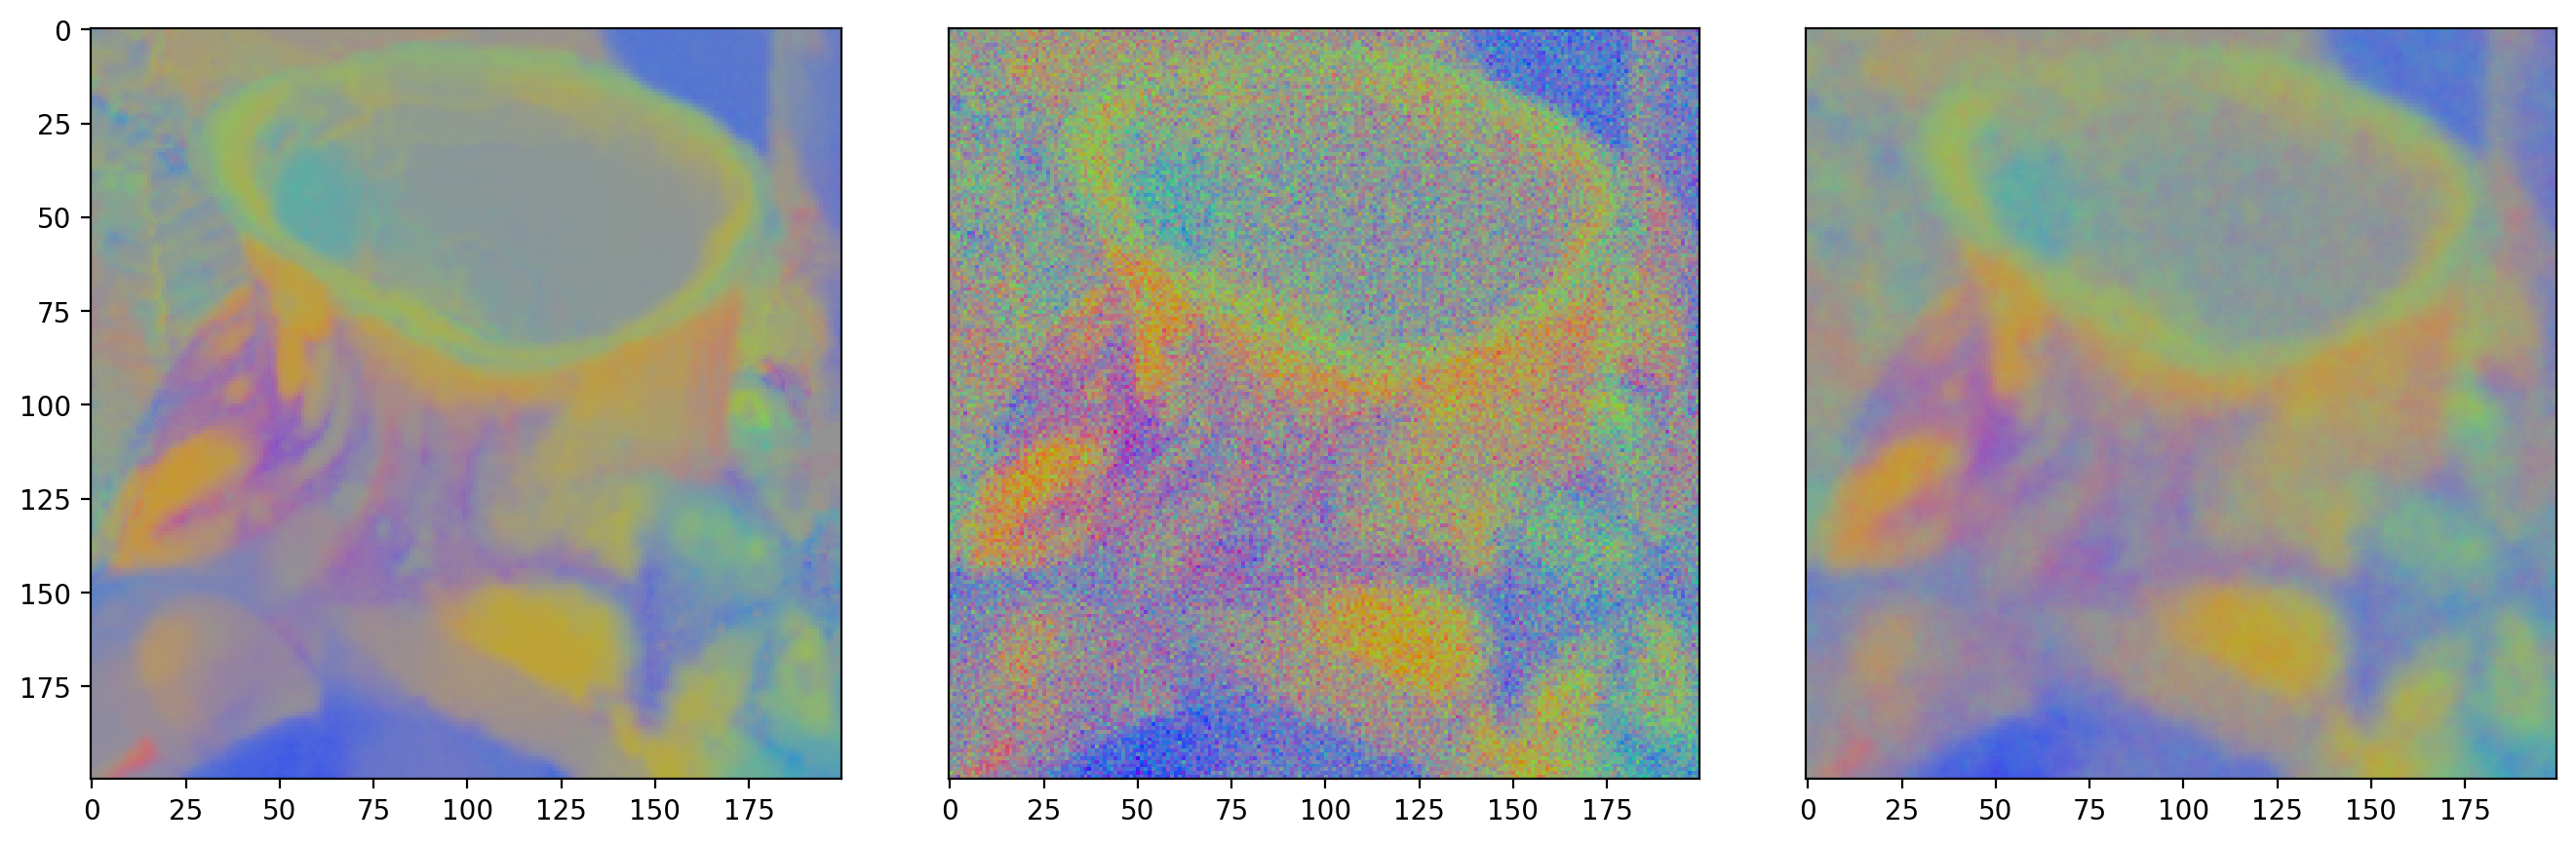

In [30]:
relaxed_tikhonov_sphere_image.plotS2_rgb_image(Noiseimag, Dataimag, q)